Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3   

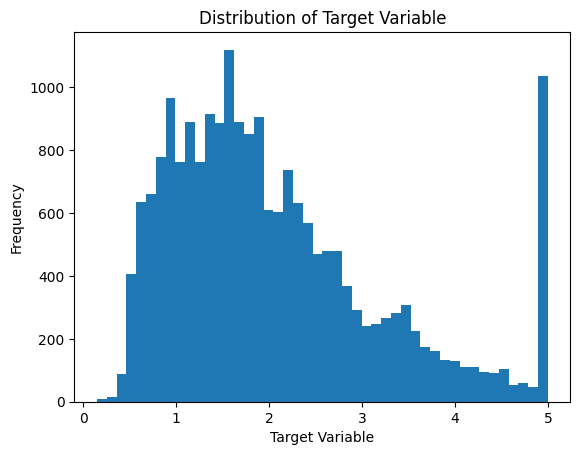

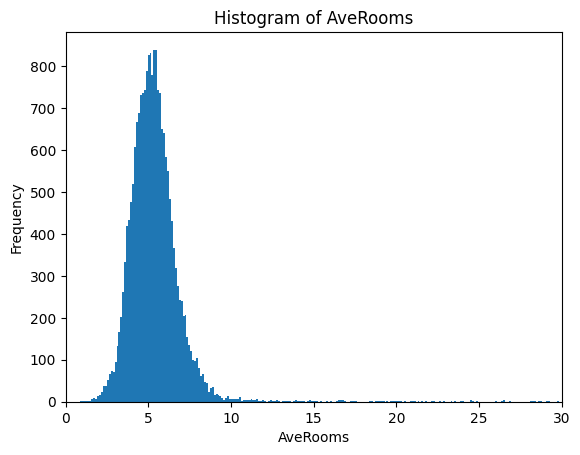

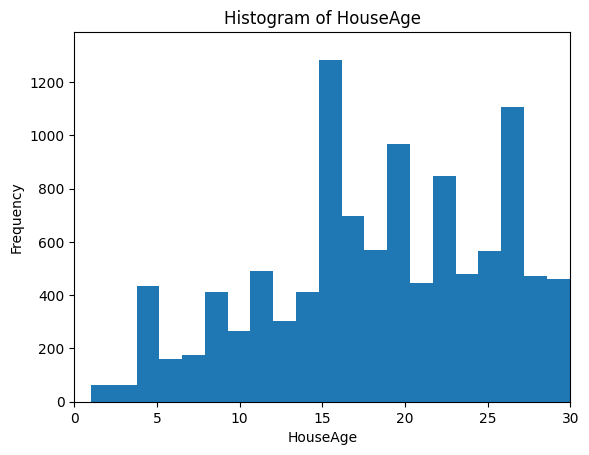

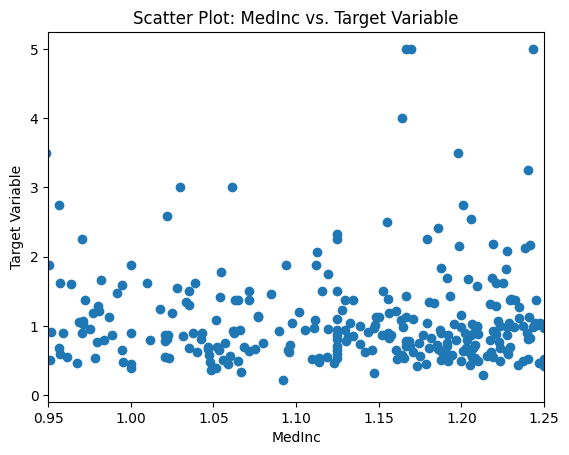

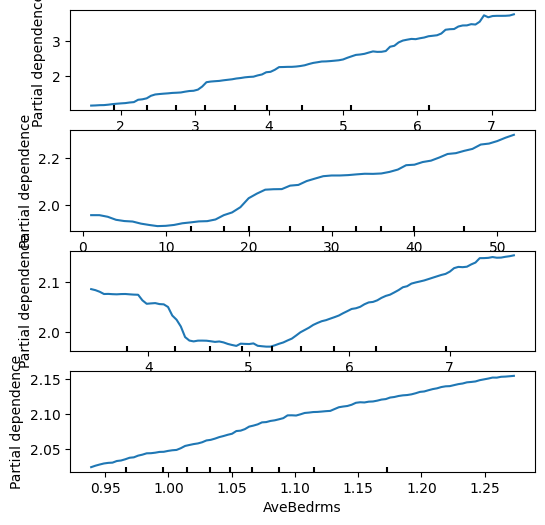

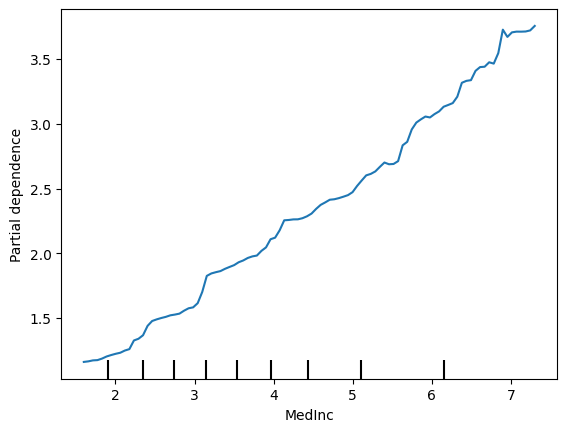

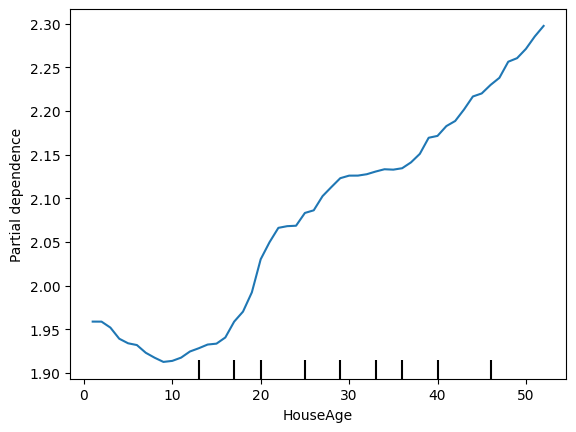

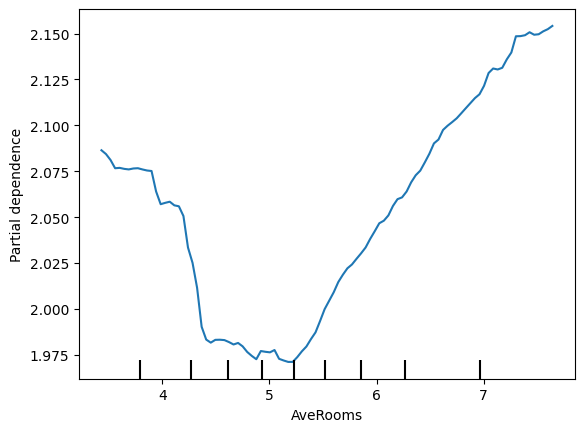

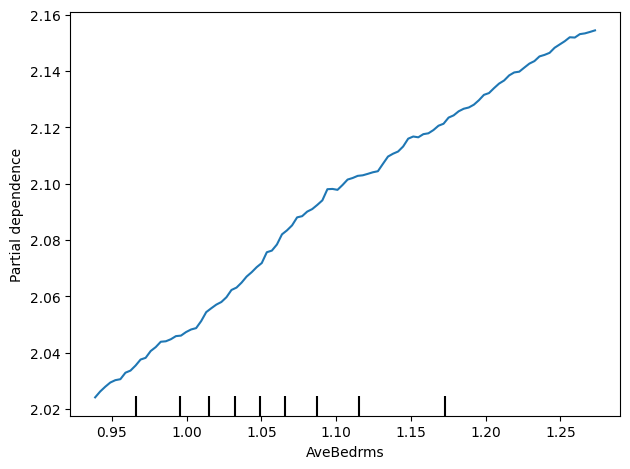

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


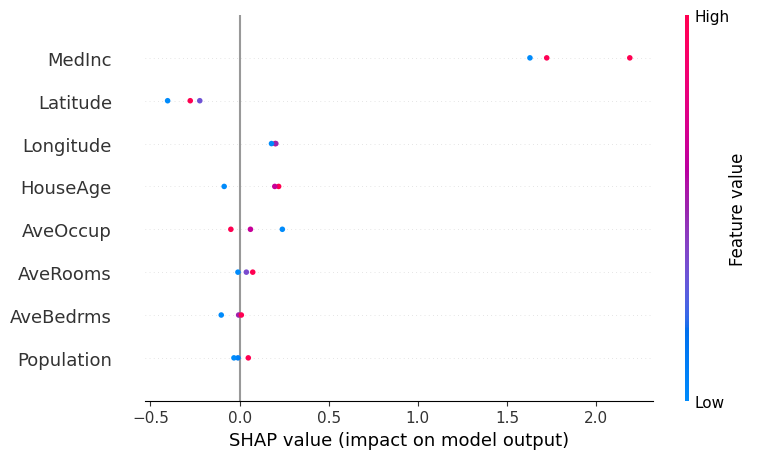

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
!pip install shap
import shap

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)

# Display the top 5 rows of the data
# Split the data into features and target variable
X = california.data
y = california.target
feature_names = X.columns

# Understand the data 

# Print the top 10 rows
print(X.head(10))


# Concatenate data and target variables along the columns
california_data = X.copy()
california_data['target'] = y


# Print the top 10 rows
print(california_data.head(10))

# visualize some variables from dataset for exploration reasons
plt.hist(y, bins='auto')
plt.xlabel("Target Variable")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.show()

# Access the "AveRooms" variable from the DataFrame structure
ave_rooms = california['data']['AveRooms']

# Plot the histogram of AveRooms
plt.hist(ave_rooms, bins='auto')
plt.xlabel("AveRooms")
plt.ylabel("Frequency")
plt.title("Histogram of AveRooms")
plt.xlim(0, 30)  # Set the x-axis limits
plt.show()

# Access the "HouseAge" variable from the DataFrame structure
house_age = california['data']['HouseAge']

# Plot the histogram of AveRooms
plt.hist(house_age, bins='auto')
plt.xlabel("HouseAge")
plt.ylabel("Frequency")
plt.title("Histogram of HouseAge")
plt.xlim(0, 30)  # Set the x-axis limits
plt.show()


# Extract the MedInc
med_inc = X['MedInc']

# Create a scatter plot
plt.scatter(med_inc, y)
plt.xlabel('MedInc')
plt.ylabel('Target Variable')
plt.title('Scatter Plot: MedInc vs. Target Variable')
plt.xlim(0.95, 1.25)  # Set the x-axis limits
plt.show()

# Build model:  Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
rf_model.fit(X, y)



# Specify the features for which to compute the partial dependence
features = [0, 1, 2, 3]  # Example: Compute partial dependence for features 0, 1, 2, and 3

# Create a figure with subplots
fig, axes = plt.subplots(len(features), 1, figsize=(6, 6))

# Compute and plot the partial dependence for each feature
for i, feature in enumerate(features):
    display = PartialDependenceDisplay.from_estimator(rf_model, X, features=[feature])
    display.plot(ax=axes[i])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# Initialize the SHAP explainer
explainer = shap.Explainer(rf_model)

# Calculate Shapley values for a sample of data points
sample_indices = [0, 1, 2]  # Example: calculate Shapley values for the first three data points
shap_values = explainer.shap_values(X.iloc[sample_indices])

# Plot the Shapley values
shap.summary_plot(shap_values, X.iloc[sample_indices], feature_names=feature_names)



